In [4]:
from bs4 import BeautifulSoup
import pandas
import numpy
import urllib.request as req

In [15]:
res = req.urlopen('https://pedia.watcha.com/ko-KR/')
soup = BeautifulSoup(res, 'html.parser')


<!DOCTYPE doctype html>

<html lang="ko-KR">
<head>
<script async="" src="https://www.googletagmanager.com/gtag/js?id=G-1PYHGTCRYW"></script><script async="" defer="" src="https://www.google-analytics.com/analytics.js"></script>
<!-- Universal Analytics(analytics.js) & Global Site Tag(gtag.js) -->
<script>
      window.dataLayer = window.dataLayer || [
        { dimension5: 'undefined' },
        { dimension6: 'undefined' }
      ];
      function gtag(){dataLayer.push(arguments);}
      gtag('js', new Date());
      gtag('config', "G-1PYHGTCRYW");

      window.ga=function(){ga.q.push(arguments)};ga.q=[];ga.l=+new Date;
      ga("create","UA-27006241-7", "auto");
    </script>
<!-- Google Tag Manager -->
<script>
      (function(w,d,s,l,i){w[l]=w[l]||[];w[l].push({'gtm.start':
      new Date().getTime(),event:'gtm.js'});var f=d.getElementsByTagName(s)[0],
      j=d.createElement(s),dl=l!='dataLayer'?'&l='+l:'';j.async=true;j.src=
      'https://www.googletagmanager.com/gtm.js?id='+i+
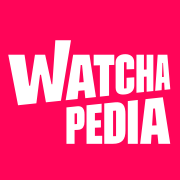
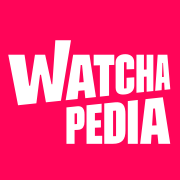
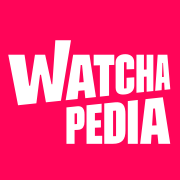
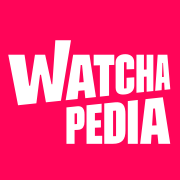
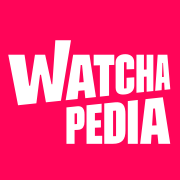
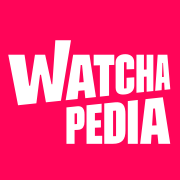
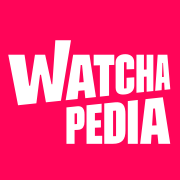
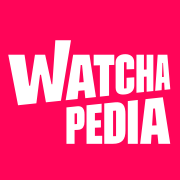

In [24]:
soup

In [38]:
# tag로 찾기 ! 
# 근데 이거는 맨 처음 발견되는 태그만 나옴
soup.meta

<meta charset="utf-8"/>

In [75]:
# 태그가 여러개면? id나 content 등 , 태그 뒤에 붙은, 예를들어 <div id = '??'  여기서 '??'로 찾는 것 
# 참고 class는 예약어?라고 해서 class_ = 'ㅇㅇㅇ' 이렇게 검색해야 나옴!
# find_all은 리스트로 가지고 옴
soup.find_all(content='ie=edge')

[<meta content="ie=edge" http-equiv="x-ua-compatible"/>]

In [80]:
soup.find('img')

<img class="e1pon7hn0 css-1yb1em6-Img-LazyLoadingImg ewlo9841" src="https://dhgywazgeek0d.cloudfront.net/watcha/image/upload/c_fill,h_700,q_80,w_490/v1602653039/kjdvdyucvpq6mb9kpxbj.jpg"/>

In [81]:
# 이렇게 속성값으로!
soup.find('img')['class']

list

In [82]:
soup.find('img')['src']

'https://dhgywazgeek0d.cloudfront.net/watcha/image/upload/c_fill,h_700,q_80,w_490/v1602653039/kjdvdyucvpq6mb9kpxbj.jpg'

# 학교 급식표 크롤링해보자

In [112]:
# 이게 url 임 ! :http://school.cbe.go.kr/cbs-h/M01050705/list?ymd=20201009

# 그런데 여기 보면 ymd = '   ' 부분이 바뀌면서 날짜별로 나올 것을 알 수 있음! 따라서 잘 활용하자

# 202010을 기준으로 baseurl로 하고, 09, 10 등등을 그 뒤에 넣어 주는 방식으로 하자

In [113]:
from bs4 import BeautifulSoup
import urllib.request as req

In [117]:
baseURL= 'http://school.cbe.go.kr/cbs-h/M01050705/list?ymd=2020'
date = '0701'

In [118]:
res = req.urlopen(baseURL + date)
soup = BeautifulSoup(res, 'html.parser')

In [172]:
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=2, user-scalable=yes" name="viewport">
<!--[if lt IE 9]>
<script src="/www/js/jquery-1.12.3.min.js"></script>
<![endif]-->
<!--[if gte IE 9]>
<script src="/www/js/jquery-2.2.3.min.js"></script>
<![endif]-->
<!--[if !IE]> -->
<script src="/www/js/jquery-2.2.3.min.js"></script>
<!-- <![endif]-->
<link href="/www/favicon_CBE.ico" rel="apple-touch-icon"/>
<link href="/www/favicon_CBE.ico" rel="shortcut icon"/>
<script src="/www/js/jquery.bpopup-0.11.0.min.js"></script>
<script src="/www/js/jquery-ui-1.11.4.min.js"></script>
<script src="/www/js/default.js"></script>
<link href="/www/css/style.css" rel="stylesheet" type="text/css"/>
<link href="/www/css/jquery-ui-0.11.0.css" rel="stylesheet" type="text/css"/>
<link href="/www/css/error.css" rel="stylesheet" type="text/css"/>
<link href="/ww

In [173]:
meals = soup.find_all(class_='tch-lnc-wrap')
meals

[<li class="tch-lnc-wrap">
 <dl>
 <dt>조식</dt>
 <dd class="tch-lnc">
 <ul>
 <li>흰쌀밥
 </li>
 <li>한우청국장2.5.6.13.16.
 </li>
 <li>칠리두부조림5.6.10.12.13.15.16.18.
 </li>
 <li>전지불고기5.6.10.12.13.
 </li>
 <li>구운김/봉13.
 </li>
 <li>배추김치9.13.
 </li>
 <li>플레인요플레2.
 </li>
 <li>시리얼(과즙시리얼)+우유2.5.6.13.</li>
 </ul>
 </dd>
 <dd class="tch-img">
 <a href="/files/2020/07/cbs-h/f3fdc7a0f0544c358701cbef7f29e55a.jpg" target="_blank"><img alt="조식 식단 이미지" src="/files/2020/07/cbs-h/f3fdc7a0f0544c358701cbef7f29e55a.jpg"/></a>
 </dd>
 </dl>
 </li>, <li class="tch-lnc-wrap">
 <dl>
 <dt>중식</dt>
 <dd class="tch-lnc">
 <ul>
 <li>발아찰흑미쌀밥
 </li>
 <li>등뼈우거지국5.6.10.13.18.
 </li>
 <li>새송이애호박볶음5.6.18.
 </li>
 <li>우엉잡채1.5.6.8.13.16.18.
 </li>
 <li>가자미구이5.13.
 </li>
 <li>총각김치9.13.
 </li>
 <li>수박</li>
 </ul>
 </dd>
 <dd class="tch-img">
 <a href="/files/2020/07/cbs-h/629a4ebcec12426ea74e07c508c9e628.jpg" target="_blank"><img alt="중식 식단 이미지" src="/files/2020/07/cbs-h/629a4ebcec12426ea74e07c508c9e628.jpg"/></a>
 </dd>
 </dl>
 </li>

In [178]:
dic = {}
for meal in meals :
    meal.dt.text
    meal.ul.text
    dic.update({meal.dt.text : meal.ul.text})
print(dic['조식'])


흰쌀밥
한우청국장2.5.6.13.16.
칠리두부조림5.6.10.12.13.15.16.18.
전지불고기5.6.10.12.13.
구운김/봉13.
배추김치9.13.
플레인요플레2.
시리얼(과즙시리얼)+우유2.5.6.13.



In [179]:
dic

{'조식': '\n흰쌀밥\r\n한우청국장2.5.6.13.16.\r\n칠리두부조림5.6.10.12.13.15.16.18.\r\n전지불고기5.6.10.12.13.\r\n구운김/봉13.\r\n배추김치9.13.\r\n플레인요플레2.\r\n시리얼(과즙시리얼)+우유2.5.6.13.\n',
 '중식': '\n발아찰흑미쌀밥\r\n등뼈우거지국5.6.10.13.18.\r\n새송이애호박볶음5.6.18.\r\n우엉잡채1.5.6.8.13.16.18.\r\n가자미구이5.13.\r\n총각김치9.13.\r\n수박\n',
 '석식': '\n흰쌀밥\r\n콩가루부추된장국1.5.6.13.18.\r\n숙주나물무침\r\n사/  치즈치킨까스1501.2.5.6.12.13.15.16.18.\r\n배추김치9.13.\r\n천혜향따옴주스5.13.\n'}

In [175]:
dic

{'조식': '\n흰쌀밥\r\n한우청국장2.5.6.13.16.\r\n칠리두부조림5.6.10.12.13.15.16.18.\r\n전지불고기5.6.10.12.13.\r\n구운김/봉13.\r\n배추김치9.13.\r\n플레인요플레2.\r\n시리얼(과즙시리얼)+우유2.5.6.13.\n',
 '중식': '\n발아찰흑미쌀밥\r\n등뼈우거지국5.6.10.13.18.\r\n새송이애호박볶음5.6.18.\r\n우엉잡채1.5.6.8.13.16.18.\r\n가자미구이5.13.\r\n총각김치9.13.\r\n수박\n',
 '석식': '\n흰쌀밥\r\n콩가루부추된장국1.5.6.13.18.\r\n숙주나물무침\r\n사/  치즈치킨까스1501.2.5.6.12.13.15.16.18.\r\n배추김치9.13.\r\n천혜향따옴주스5.13.\n'}

In [162]:
for meal in meals :
    st = meal.ul.text
    st = st.replace('\n','')
    st = st.replace('\r\n','')
    st = st.replace('\r','')
    print(st, end='')

흰쌀밥한우청국장2.5.6.13.16.칠리두부조림5.6.10.12.13.15.16.18.전지불고기5.6.10.12.13.구운김/봉13.배추김치9.13.플레인요플레2.시리얼(과즙시리얼)+우유2.5.6.13.발아찰흑미쌀밥등뼈우거지국5.6.10.13.18.새송이애호박볶음5.6.18.우엉잡채1.5.6.8.13.16.18.가자미구이5.13.총각김치9.13.수박흰쌀밥콩가루부추된장국1.5.6.13.18.숙주나물무침사/  치즈치킨까스1501.2.5.6.12.13.15.16.18.배추김치9.13.천혜향따옴주스5.13.

# 이제 함수화하기 


In [185]:
def GetMeals(date='0701') :
    baseURL= 'http://school.cbe.go.kr/cbs-h/M01050705/list?ymd=2020'
    res = req.urlopen(baseURL + date)
    soup = BeautifulSoup(res, 'html.parser')
    meals = soup.find_all(class_='tch-lnc-wrap')
    dic = {}
    for meal in meals :
        meal.dt.text
        meal.ul.text
        dic.update({meal.dt.text : meal.ul.text})
        
    return dic



In [191]:
GetMeals('0709')

{'조식': '\n흰쌀밥\r\n얼갈이콩나물된장국5.6.13.18.\r\n골든치킨봉 튀김1.5.6.13.15.\r\n구운김/봉13.\r\n두부구이/양념장5.6.13.18.\r\n배추김치9.13.\r\n시리얼(코코볼)+우유1.2.3.4.5.6.13.14.\r\n레인보우케익1.2.5.6.\n',
 '중식': '\n수수밥\r\n우렁된장찌개5.6.13.18.\r\n돈육마늘장조림5.6.10.13.18.\r\n실곤약샐러드/유자청1.2.5.12.13.18.\r\n참치김치볶음5.9.13.18.\r\n총각김치9.13.\r\n청포도\n',
 '석식': '\n차조쌀밥\r\n부대찌개/라면사리1.2.5.6.9.10.13.15.16.18.\r\n닭살카레볶음2.5.6.13.15.16.\r\n식빵고르곤졸라피자1.2.5.6.10.12.13.16.\r\n배추김치9.13.\r\n요플레/딸기2.\n'}

In [197]:
user_date = input('날짜를 입력하세요 : ')
result = GetMeals(user_date)
print(result)

날짜를 입력하세요 : '0702'
{'조식': '\n흰쌀밥\r\n새우해물죽5.6.9.13.18.\r\n누룽지탕\r\n돈육장조림5.6.10.13.18.\r\n아삭이된장무침5.6.13.18.\r\n구운김/봉13.\r\n총각김치9.13.\r\n미니치즈케익1.2.5.6.13.\r\n시리얼/우유2.5.6.13.\n', '중식': '\n흰쌀밥\r\n황태버섯육개장13.\r\n얼큰갈비찜5.6.10.13.18.\r\n치즈떡볶이6.12.13.16.1.2.5.\r\n교자군만두1.5.6.10.13.15.16.18.\r\n배추김치9.13.\r\n자몽에이드5.13.\n', '석식': '\n흰쌀밥\r\n홍합순두부찌개1.5.6.9.10.12.13.17.18.\r\n오징어초무침13.17.\r\n석박지9.13.18.\r\n우리밀 트리마들랜-초코1.2.5.6.\r\n숯불구이후랑크꼬치1.2.5.6.10.13.15.\r\n허쉬드링크2.\n'}
